In [43]:
# Nama   : Mia Amaliah 
# NIM    : 1202922002
# Tugas : Random Forest

import numpy as np
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iklansosmed/Iklan_sosmed.csv


In [44]:
random = pd.read_csv('../input/iklansosmed/Iklan_sosmed.csv')
random.head()

,User ID,Kelamin,Usia,EstimasiGaji,Beli
0,15624510,Laki,19,19000,0
1,15810944,Laki,35,20000,0
2,15668575,Perempuan,26,43000,0
3,15603246,Perempuan,27,57000,0
4,15804002,Laki,19,76000,0


In [45]:
random.shape

(400, 5)

In [46]:
random.isna().sum()

User ID         0
Kelamin         0
Usia            0
EstimasiGaji    0
Beli            0
dtype: int64

In [47]:
random.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       400 non-null    int64 
 1   Kelamin       400 non-null    object
 2   Usia          400 non-null    int64 
 3   EstimasiGaji  400 non-null    int64 
 4   Beli          400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [48]:
def binary_encode(df, column, postive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == postive_value else 0)
    return df

In [49]:
random = binary_encode(random, 'Kelamin', 'Perempuan')
random.head()

,User ID,Kelamin,Usia,EstimasiGaji,Beli
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


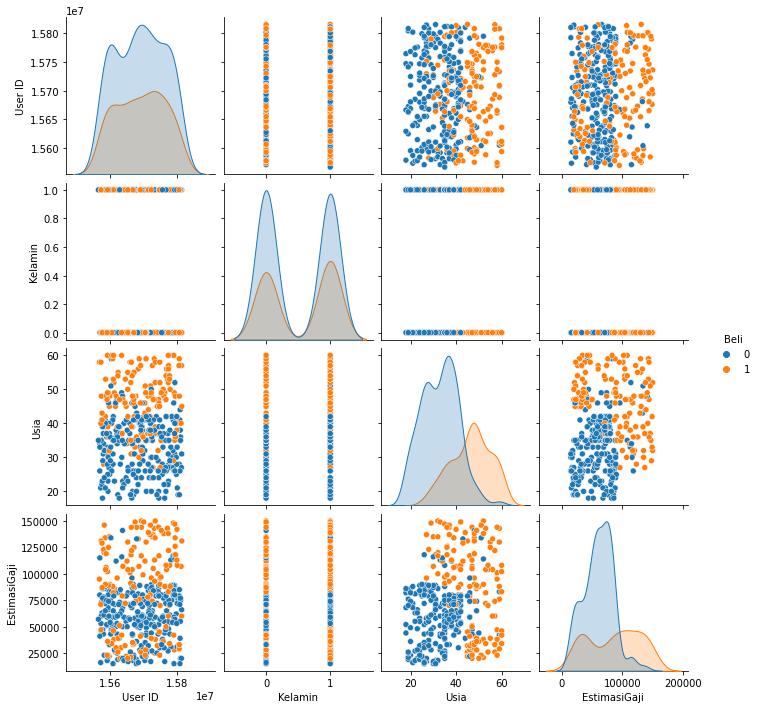

In [50]:
#visualisasi penyebaran data

sns.pairplot(data=random, hue = 'Beli', kind='scatter')

<AxesSubplot:>

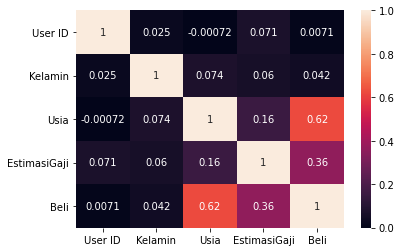

In [51]:
#korelasi antara data

sns.heatmap(random[['User ID','Kelamin', 'Usia','EstimasiGaji','Beli']].corr(), annot=True)

In [52]:
x=random.iloc[:, [2, 3]].values
y=random.iloc[:, 4].values
print (x)
print (y)

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 [    26  52000]
 [    20  86000]
 [    32  18000]
 [    18  82000]
 [    29  80000]
 [    47  25000]
 [    45  26000]
 [    46  28000]
 [    48  29000]
 [    45  22000]
 [    47  49000]
 [    48  41000]
 [    45  22000]
 [    46  23000]
 [    47  20000]
 [    49  28000]
 [    47  30000]
 [    29  43000]
 [    31  18000]
 [    31  74000]
 [    27 137000]
 [    21  16000]
 [    28  44000]
 [    27  90000]
 [    35  27000]
 [    33  28000]
 [    30  49000]
 [    26  72000]
 [    27  31000]
 [    27  17000]
 [    33  51000]
 [    35 108000]
 [    30  15000]
 [    28  84000]
 [    23  20000]
 [    25  79000]
 [    27  54000]
 [    30 135000]
 [    31  89000]
 [    24  32000]
 [    18  44000]
 [    29  83000]
 [    35  23000]
 [    27  58000]
 [    24  55000]
 [    23  48000]
 [    28  79000]
 [    22  1800

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [54]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
 

In [55]:
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=0)

In [56]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [57]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score (y_test,y_pred)
cr = classification_report (y_test,y_pred)

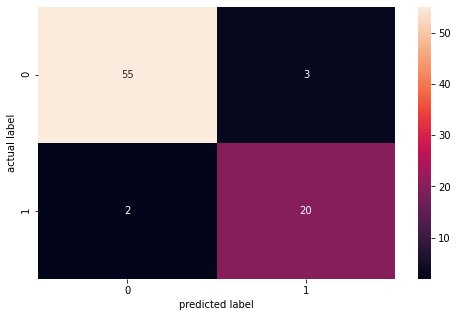

0.9375
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.87      0.91      0.89        22

    accuracy                           0.94        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80



In [58]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("predicted label")
plt.ylabel("actual label")
plt.show()

print (ac)
print (cr)

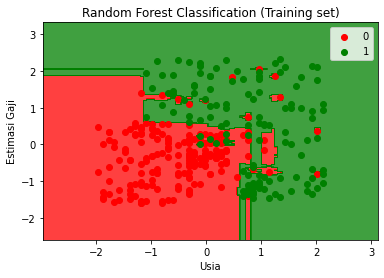

In [59]:
# Visualisasi hasil model Decision Tree Classification dari Training set
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()
